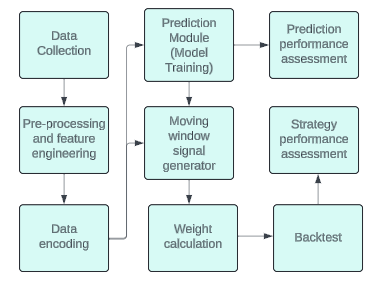

In [1]:
import sys
from pathlib import Path
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

In [2]:
from PreProcessing.Simple_preprocess import simple_data_prep
from PreProcessing.AutoEncoder import main_ae

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Read data

In [4]:
import pandas as pd
from pathlib import Path

# Define the absolute path
data_file = Path(r'C:\Users\peter\outs\onlyme\000. Reseach\000. Egyetem\2024tavasz\Selected\Deep_Index_Strategy_2\Data_collection\combined_data.csv')
data = pd.read_csv(data_file)


# 2. Preprocess Data

In [5]:
# the output of the function is  return  data, data_no_ret, data_no_vix, data_no_ret_vix
# extract all the tables
data, data_no_ret, data_no_vix, data_no_ret_vix = simple_data_prep(data)

# 3. Apply AutoEncoder to the data 


In [6]:
data_for_join=data.copy()
data_for_join['Date'] = pd.to_datetime(data_for_join['Date'])
data_for_join.set_index('Date', inplace=True)

## 3.1 VIX

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/400
1/1 [==============================] - 0s 65ms/step - loss: 1.3780 - mean_squared_error: 1.3780
Epoch 2/400
1/1 [==============================] - 0s 68ms/step - loss: 1.3151 - mean_squared_error: 1.3151
Epoch 3/400
1/1 [==============================] - 0s 95ms/step - loss: 1.2730 - mean_squared_error: 1.2730
Epoch 4/400
1/1 [==============================] - 0s 76ms/step - loss: 1.24

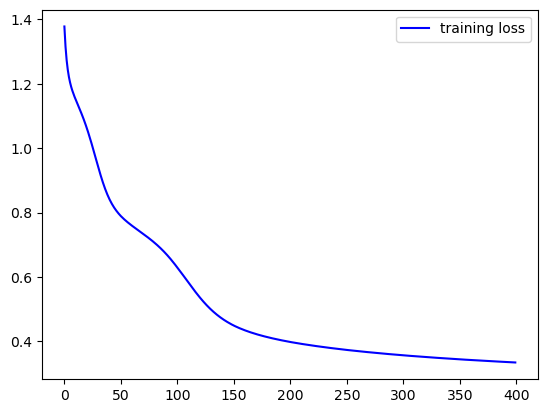

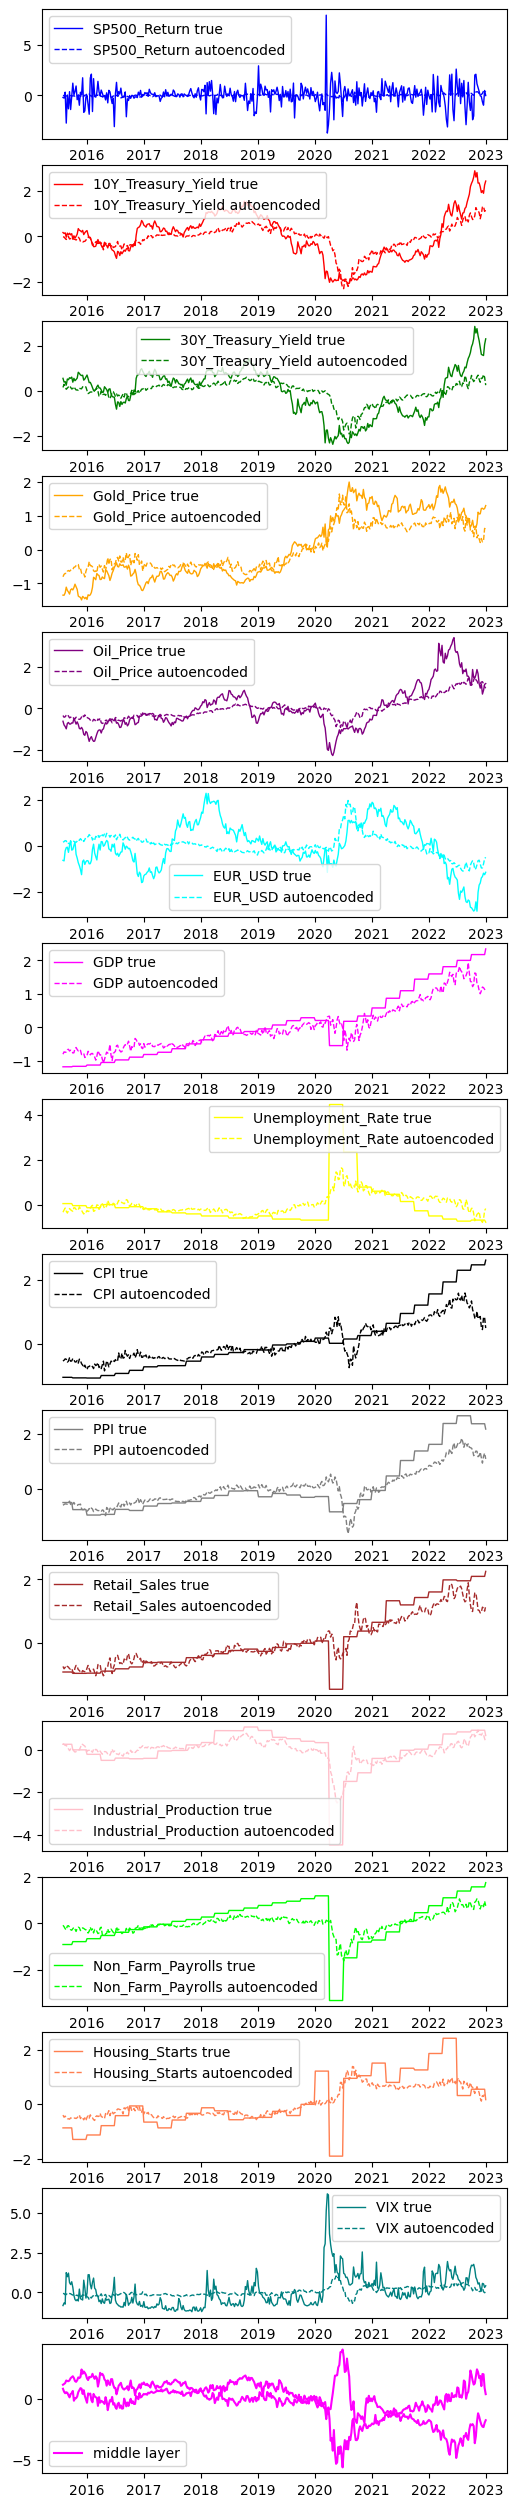

In [7]:


signals = ['SP500_Return', '10Y_Treasury_Yield', '30Y_Treasury_Yield', 'Gold_Price', 'Oil_Price', 'EUR_USD', 'GDP', 'Unemployment_Rate', 'CPI', 'PPI', 'Retail_Sales', 'Industrial_Production', 'Non_Farm_Payrolls', 'Housing_Starts']
targets = 'VIX'
out=main_ae(signals, targets, data)

# process the output
autoencoded_data_for_vix_pred=out[0]
autoencoded_data_for_vix_pred.columns = ['SP500_Return', '10Y_Treasury_Yield', '30Y_Treasury_Yield', 'Gold_Price', 'Oil_Price', 'EUR_USD', 'GDP', 'Unemployment_Rate', 'CPI', 'PPI', 'Retail_Sales', 'Industrial_Production', 'Non_Farm_Payrolls', 'Housing_Starts']

# append the VIX to the autoencoded data
original_data_for_vix_pred=out[1]

# Ensure the Date index is set for both DataFrames
autoencoded_data_for_vix_pred.index = pd.to_datetime(autoencoded_data_for_vix_pred.index)
data_for_join=data.copy()
data_for_join['Date'] = pd.to_datetime(data_for_join['Date'])
data_for_join.set_index('Date', inplace=True)

# Join the DataFrames on the Date index
joined_data_autoencoded_data_for_vix_pred = autoencoded_data_for_vix_pred.join(data_for_join[['VIX']], how='inner')




## 3.2 SP500

Epoch 1/400
1/1 [==============================] - 0s 68ms/step - loss: 1.3331 - mean_squared_error: 1.3331
Epoch 2/400
1/1 [==============================] - 0s 75ms/step - loss: 1.2898 - mean_squared_error: 1.2898
Epoch 3/400
1/1 [==============================] - 0s 74ms/step - loss: 1.2584 - mean_squared_error: 1.2584
Epoch 4/400
1/1 [==============================] - 0s 77ms/step - loss: 1.2347 - mean_squared_error: 1.2347
Epoch 5/400
1/1 [==============================] - 0s 91ms/step - loss: 1.2160 - mean_squared_error: 1.2160
Epoch 6/400
1/1 [==============================] - 0s 93ms/step - loss: 1.2005 - mean_squared_error: 1.2005
Epoch 7/400
1/1 [==============================] - 0s 83ms/step - loss: 1.1873 - mean_squared_error: 1.1873
Epoch 8/400
1/1 [==============================] - 0s 69ms/step - loss: 1.1755 - mean_squared_error: 1.1755
Epoch 9/400
1/1 [==============================] - 0s 65ms/step - loss: 1.1647 - mean_squared_error: 1.1647
Epoch 10/400
1/1 [==========

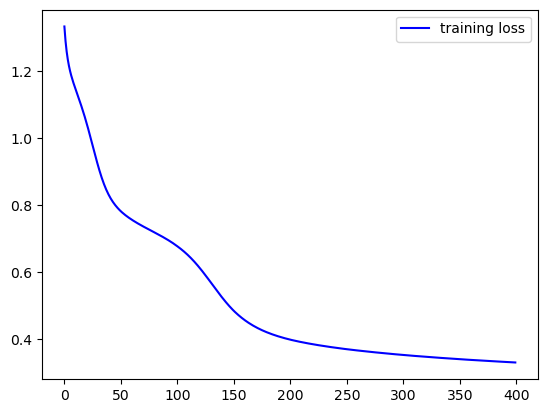

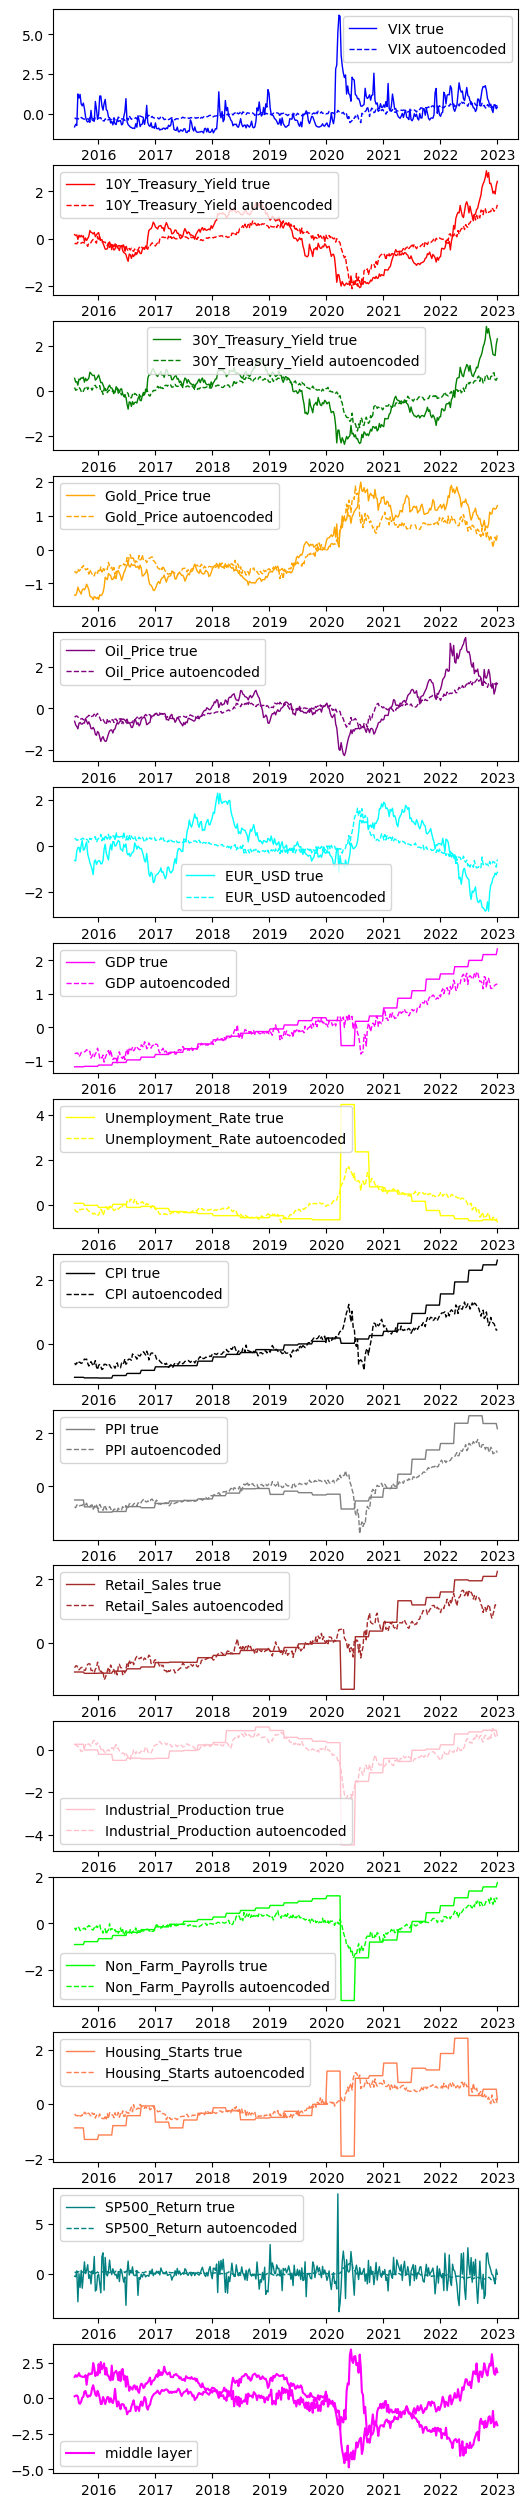

In [8]:
signals = ['VIX', '10Y_Treasury_Yield', '30Y_Treasury_Yield', 'Gold_Price', 'Oil_Price', 'EUR_USD', 'GDP', 'Unemployment_Rate', 'CPI', 'PPI', 'Retail_Sales', 'Industrial_Production', 'Non_Farm_Payrolls', 'Housing_Starts']
targets = 'SP500_Return' 
out=main_ae(signals, targets, data)

# process the output
autoencoded_data_for_sp_pred=out[0]
autoencoded_data_for_sp_pred.columns = ['VIX', '10Y_Treasury_Yield', '30Y_Treasury_Yield', 'Gold_Price', 'Oil_Price', 'EUR_USD', 'GDP', 'Unemployment_Rate', 'CPI', 'PPI', 'Retail_Sales', 'Industrial_Production', 'Non_Farm_Payrolls', 'Housing_Starts']

# append the VIX to the autoencoded data
original_data_for_sp_pred=out[1]

# Ensure the Date index is set for both DataFrames
autoencoded_data_for_sp_pred.index = pd.to_datetime(autoencoded_data_for_sp_pred.index)

# Join the DataFrames on the Date index
joined_data_autoencoded_data_for_sp_pred = autoencoded_data_for_sp_pred.join(data_for_join[['SP500_Return']], how='inner')


# 4. Create Predictions Using the Autoencoded Features
## 4.1. VIX 

In [9]:
joined_data_autoencoded_data_for_vix_pred

SP500_Return  10Y_Treasury_Yield  30Y_Treasury_Yield  Gold_Price  \
Date                                                                           
2015-08-02     -0.040064           -0.017477            0.156290   -0.803316   
2015-08-09     -0.012001           -0.024149            0.297262   -0.730865   
2015-08-16     -0.036609           -0.086078            0.200633   -0.703914   
2015-08-23     -0.073324           -0.132313            0.074003   -0.705256   
2015-08-30     -0.059867           -0.050376            0.127298   -0.638473   
...                  ...                 ...                 ...         ...   
2022-12-04      0.076048            0.986156            0.568216    0.331039   
2022-12-11      0.178872            1.293876            0.568089    0.230331   
2022-12-18      0.430726            1.310830            0.725574    0.269183   
2022-12-25      0.469227            1.099346            0.611565    0.630031   
2023-01-01      0.338155            1.151157            0.257559    0.588856   

            Oil_Price   EUR_USD       GDP  Unemployment_Rate       CPI  \
Date                                                                     
2015-08-02  -0.345262  0.154640 -0.800814          -0.313320 -0.540774   
2015-08-09  -0.428098  0.175691 -0.730585          -0.212252 -0.513842   
2015-08-16  -0.405320  0.221069 -0.745360          -0.126942 -0.471332   
2015-08-23  -0.333005  0.208302 -0.732320          -0.267983 -0.483427   
2015-08-30  -0.294703  0.084171 -0.665473          -0.350893 -0.574911   
...               ...       ...       ...                ...       ...   
2022-12-04   1.269203 -0.971513  1.093375          -0.689000  0.521403   
2022-12-11   1.287190 -0.966995  1.205511          -0.765808  0.444978   
2022-12-18   1.189440 -0.795663  1.186938          -0.618097  0.839575   
2022-12-25   1.042907 -0.564417  1.135786          -0.239221  0.817081   
2023-01-01   0.972630 -0.507039  1.103942          -0.149772  0.492889   

                 PPI  Retail_Sales  Industrial_Production  Non_Farm_Payrolls  \
Date                                                                           
2015-08-02 -0.609084     -0.755235               0.281609          -0.080746   
2015-08-09 -0.579772     -0.829397               0.244322          -0.143078   
2015-08-16 -0.556603     -0.785095               0.197528          -0.229043   
2015-08-23 -0.565998     -0.724183               0.193242          -0.275573   
2015-08-30 -0.566746     -0.757059               0.132394          -0.110860   
...              ...           ...                    ...                ...   
2022-12-04  1.131201      0.964848               0.677419           0.801275   
2022-12-11  0.930961      1.121587               0.764224           0.824740   
2022-12-18  1.180299      1.097517               0.703562           0.721395   
2022-12-25  1.294098      0.994930               0.515591           0.953190   
2023-01-01  1.085452      1.160675               0.361341           0.758548   

            Housing_Starts        VIX  
Date                                   
2015-08-02       -0.398822  12.120000  
2015-08-09       -0.476113  13.390000  
2015-08-16       -0.434262  12.830000  
2015-08-23       -0.500869  28.030001  
2015-08-30       -0.530171  26.049999  
...                    ...        ...  
2022-12-04        0.113855  19.059999  
2022-12-11        0.317078  22.830000  
2022-12-18        0.285819  22.620001  
2022-12-25        0.371338  20.870001  
2023-01-01        0.358715  21.670000  

[388 rows x 15 columns]

Early stopping at epoch 36 for CNN
Early stopping at epoch 41 for RNN
Early stopping at epoch 52 for GRU
Early stopping at epoch 37 for LSTM


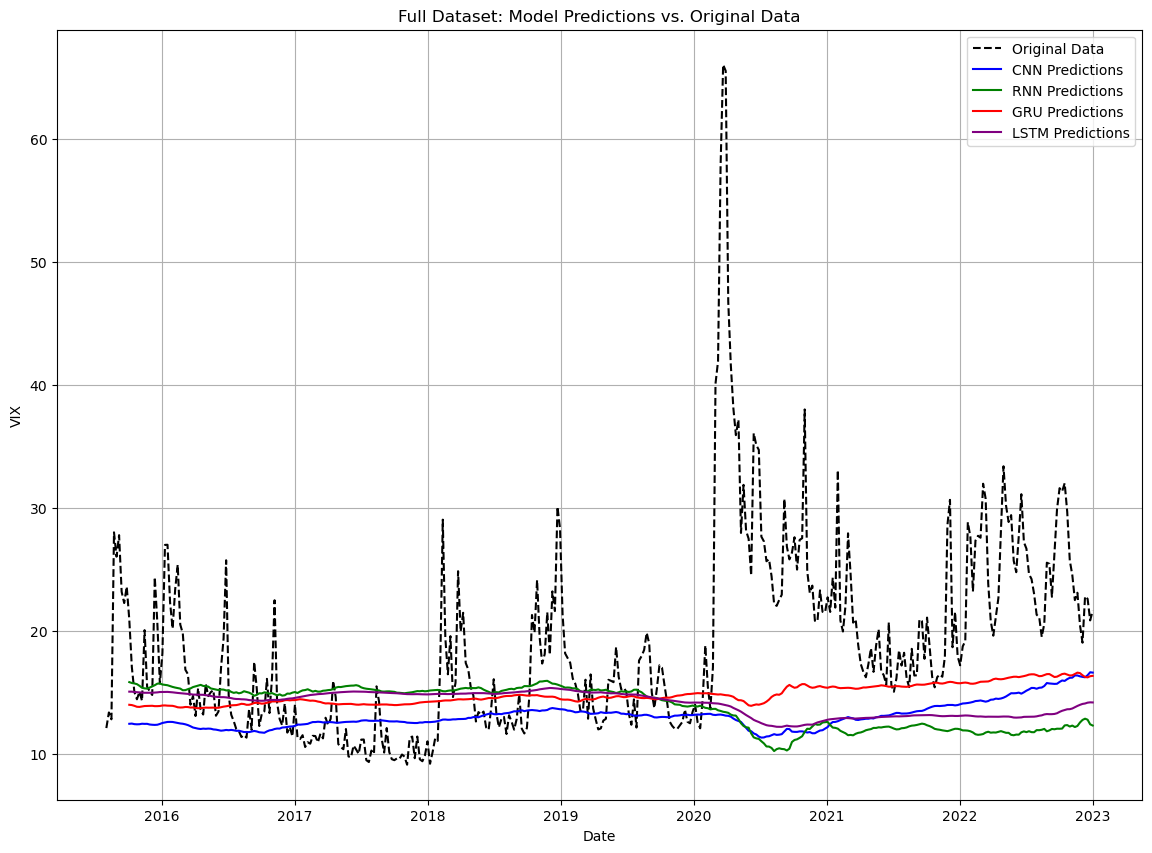

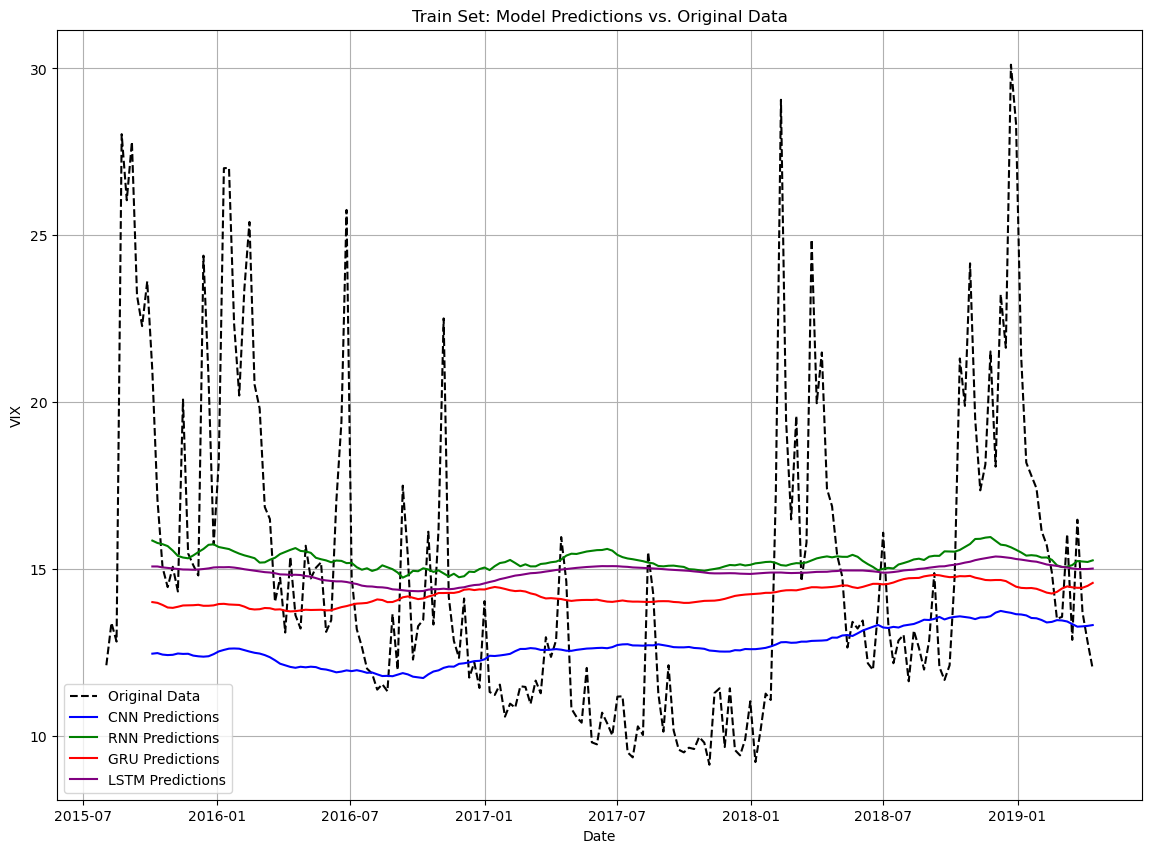

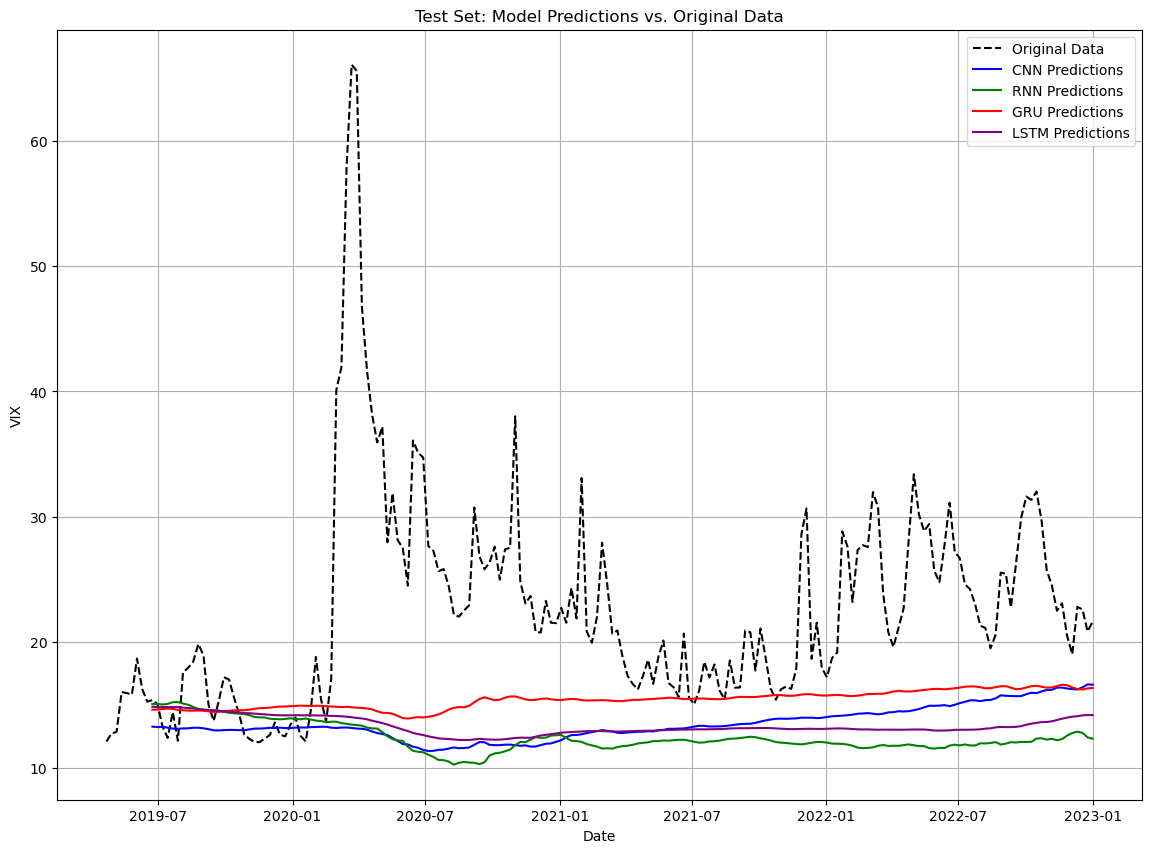

In [10]:
from Predictor_models.predictor_module import predictor_module

# Example usage
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/vix_prediction"
model_names = ['CNN', 'RNN', 'GRU', 'LSTM']
target_variable = 'VIX'

predictions_full_df_vix, predictions_train_df_vix, predictions_test_df_vix = predictor_module(
    joined_data_autoencoded_data_for_vix_pred, model_names, target_variable, output_dir
)



## 4.2. SP500

Early stopping at epoch 61 for CNN
Early stopping at epoch 60 for RNN
Early stopping at epoch 85 for GRU
Early stopping at epoch 74 for LSTM


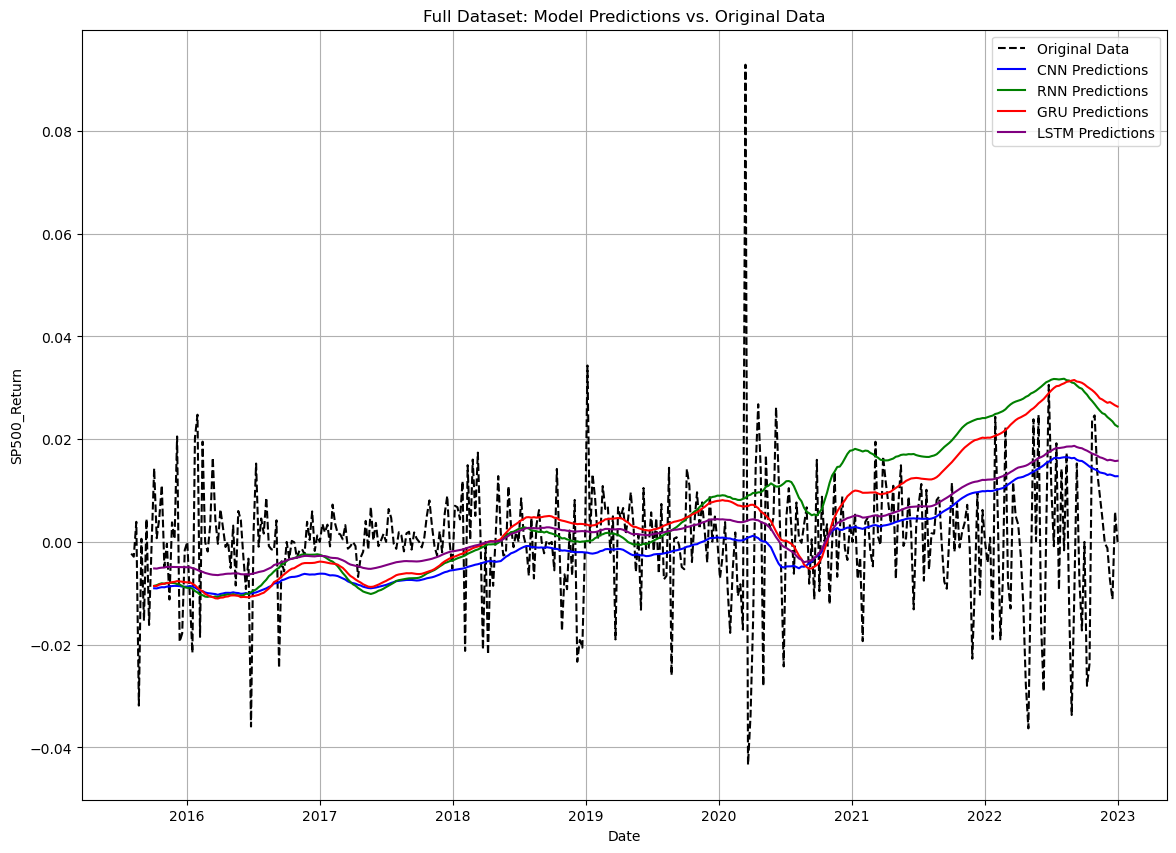

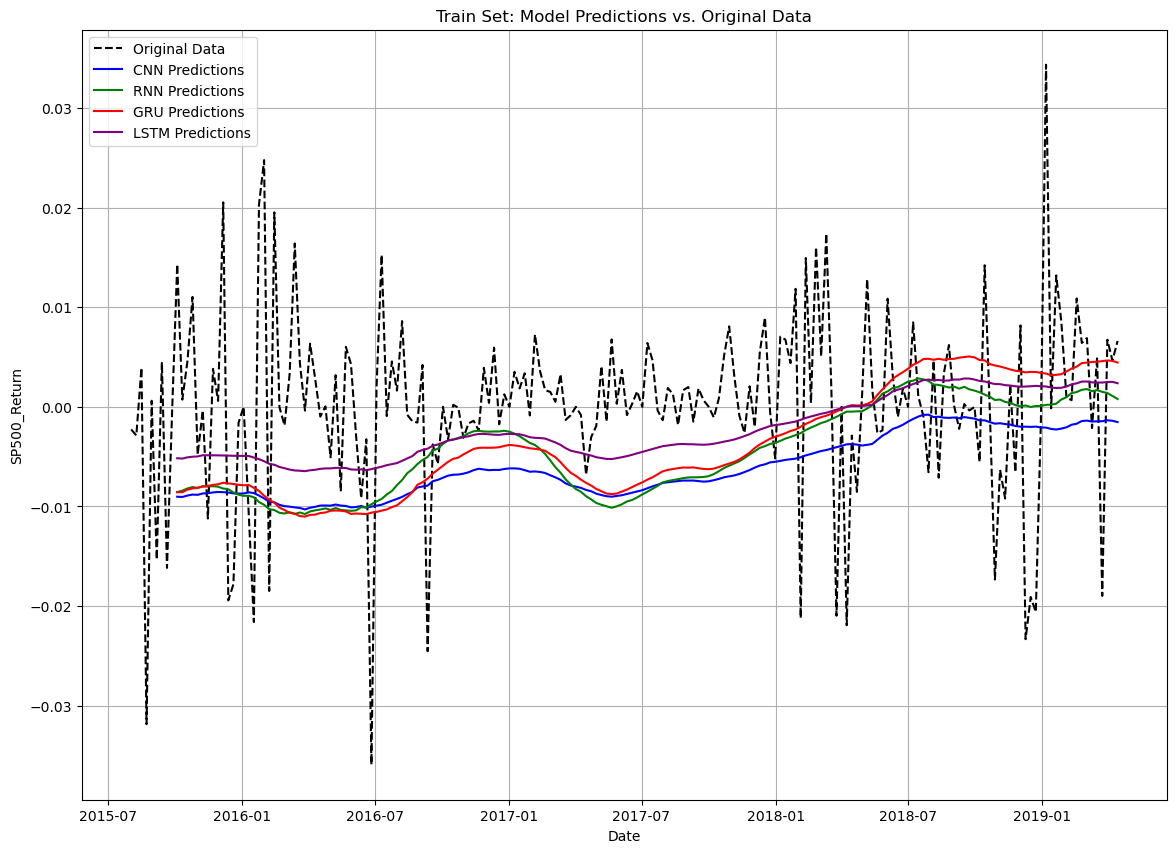

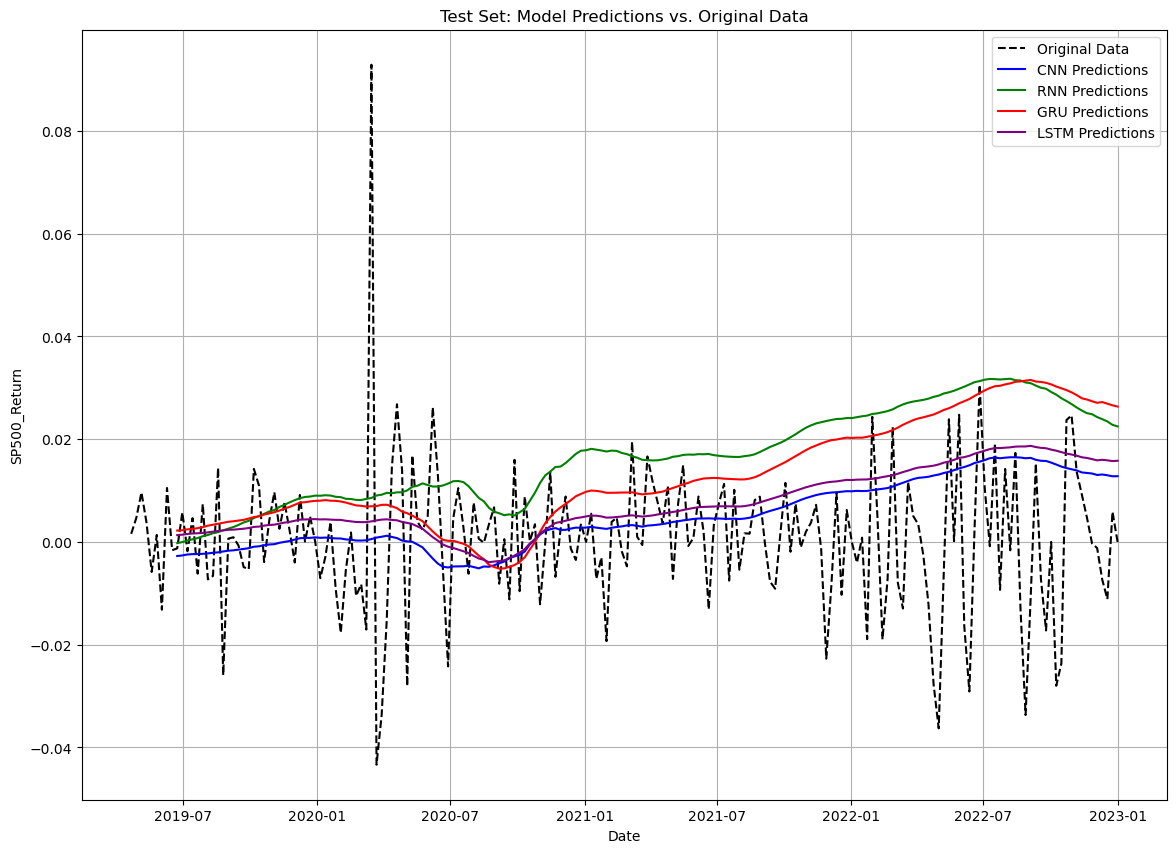

In [11]:
from Predictor_models.predictor_module import predictor_module

# Example usage
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/sp_prediction"
model_names = ['CNN', 'RNN', 'GRU', 'LSTM']
target_variable = 'SP500_Return'

predictions_full_df_sp, predictions_train_df_sp, predictions_test_df_sp = predictor_module(
    joined_data_autoencoded_data_for_sp_pred, model_names, target_variable, output_dir
)



# 5. Generate Trading Signals

## 5.1 Vol Strategy

In [44]:
# add sp to the column to make it processable for the signal generatol predictions_full_df_vix, predictions_train_df_vix, predictions_test_df_vix
predictions_full_df_vix['SP500_Return'] = predictions_full_df_sp['Real']
predictions_train_df_vix['SP500_Return'] = predictions_train_df_sp['Real']
predictions_test_df_vix['SP500_Return'] = predictions_test_df_sp['Real']

In [45]:
from Signal_Generator.signal_generator import generate_signal_table_vol
from Signal_Generator.signal_generator import plot_signals_vol

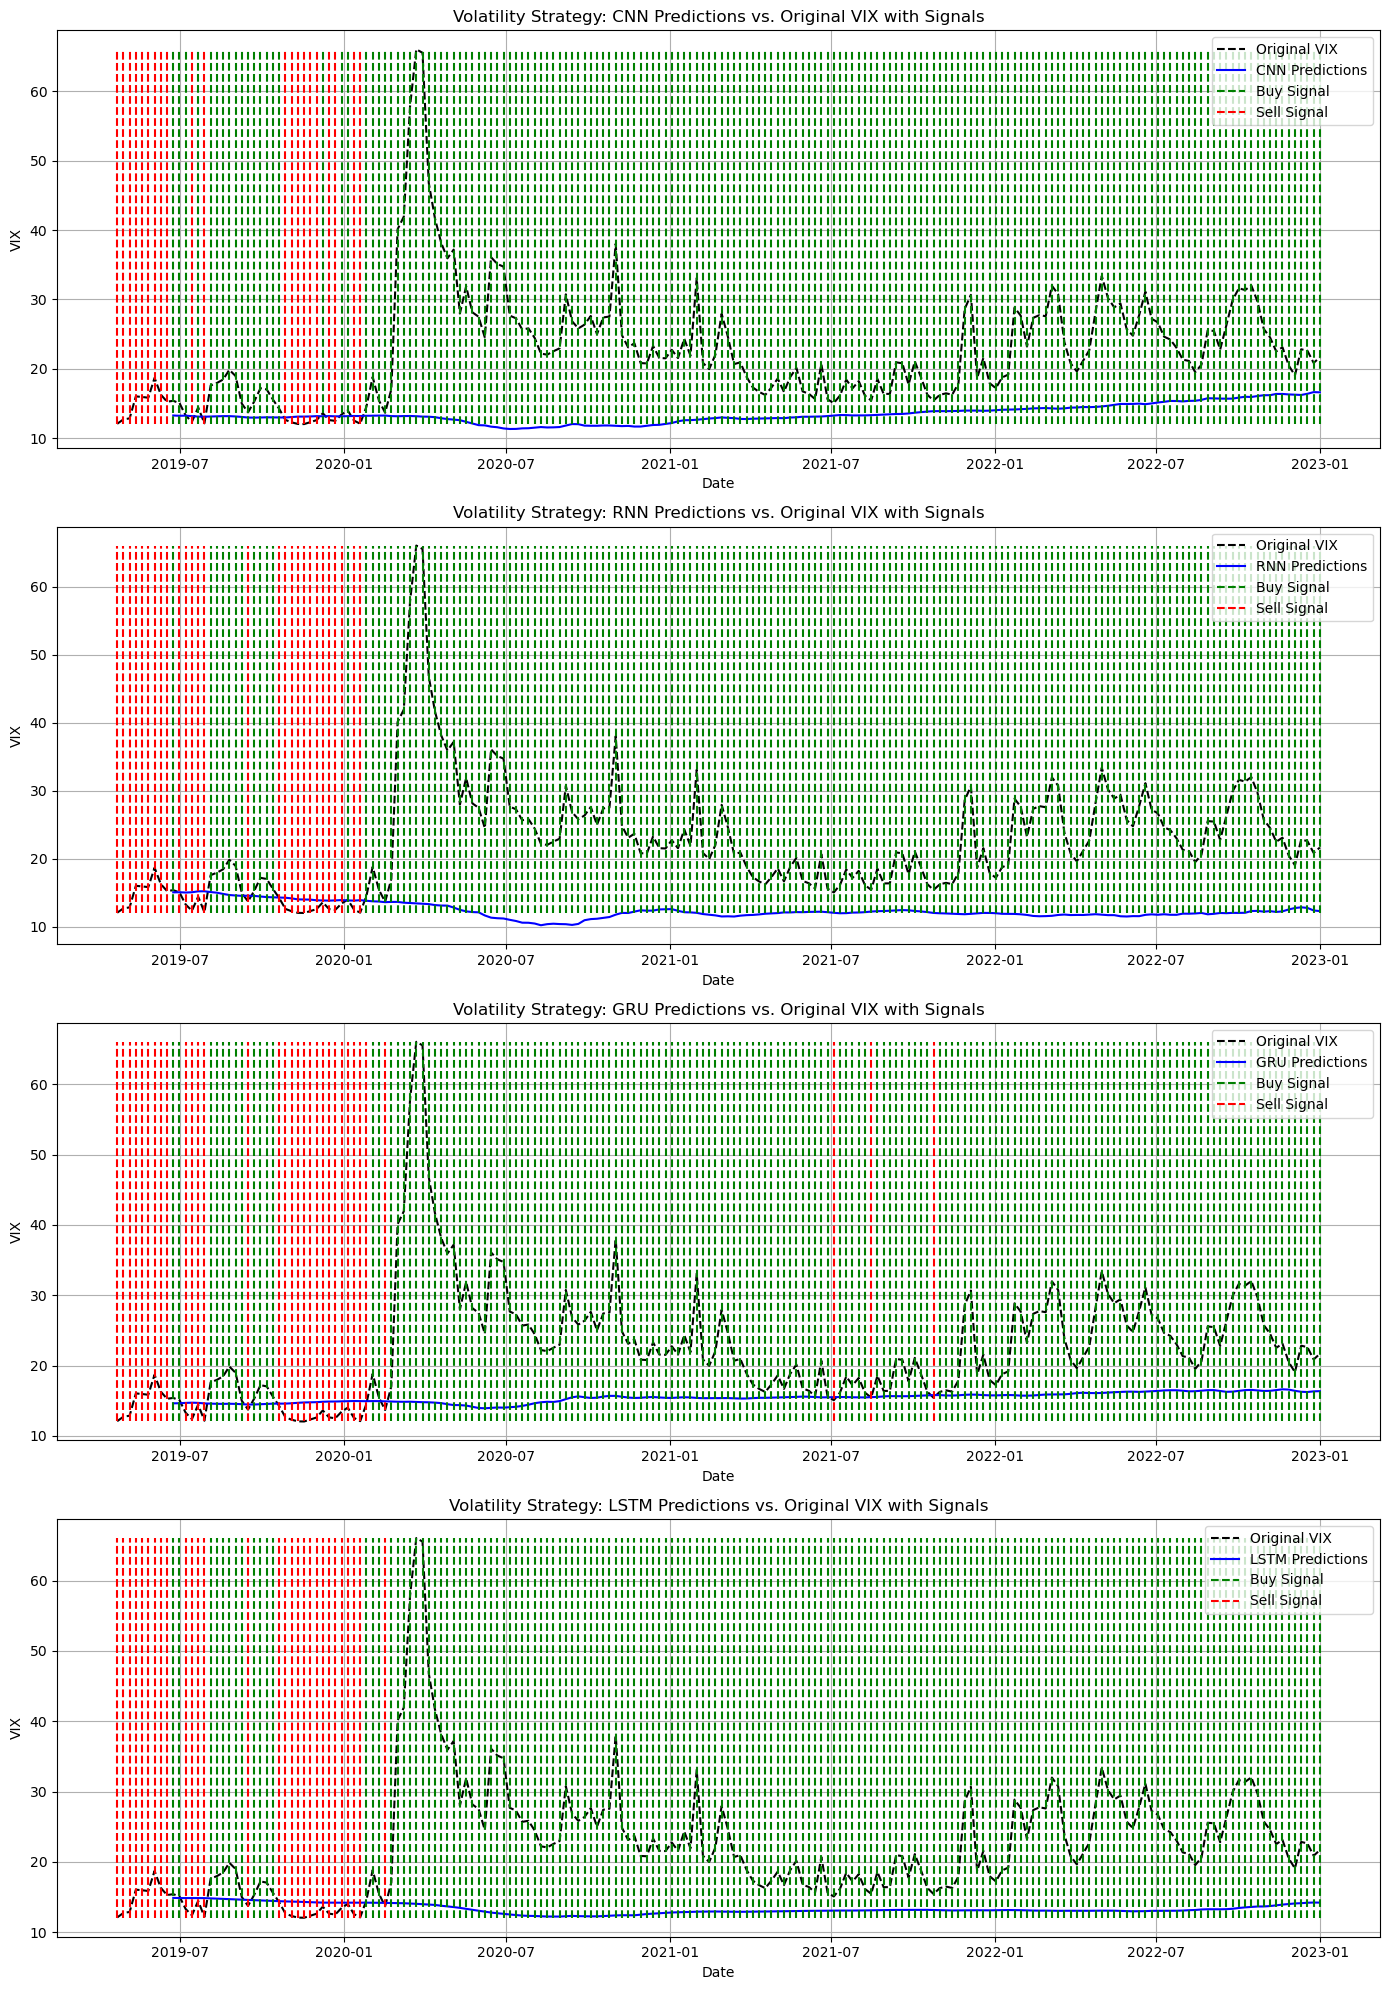

In [46]:
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/vix_signals"
model_names = ['CNN', 'RNN', 'GRU', 'LSTM']

# Generate signal tables for both strategies
signal_table_vol = generate_signal_table_vol(predictions_test_df_vix)


# Plot signals for Volatility strategy
plot_signals_vol(predictions_test_df_vix, signal_table_vol, model_names, output_dir)




## 5.2 SP Strategy

In [47]:
from Signal_Generator.signal_generator import generate_signal_table_sp500
from Signal_Generator.signal_generator import plot_signals_sp500

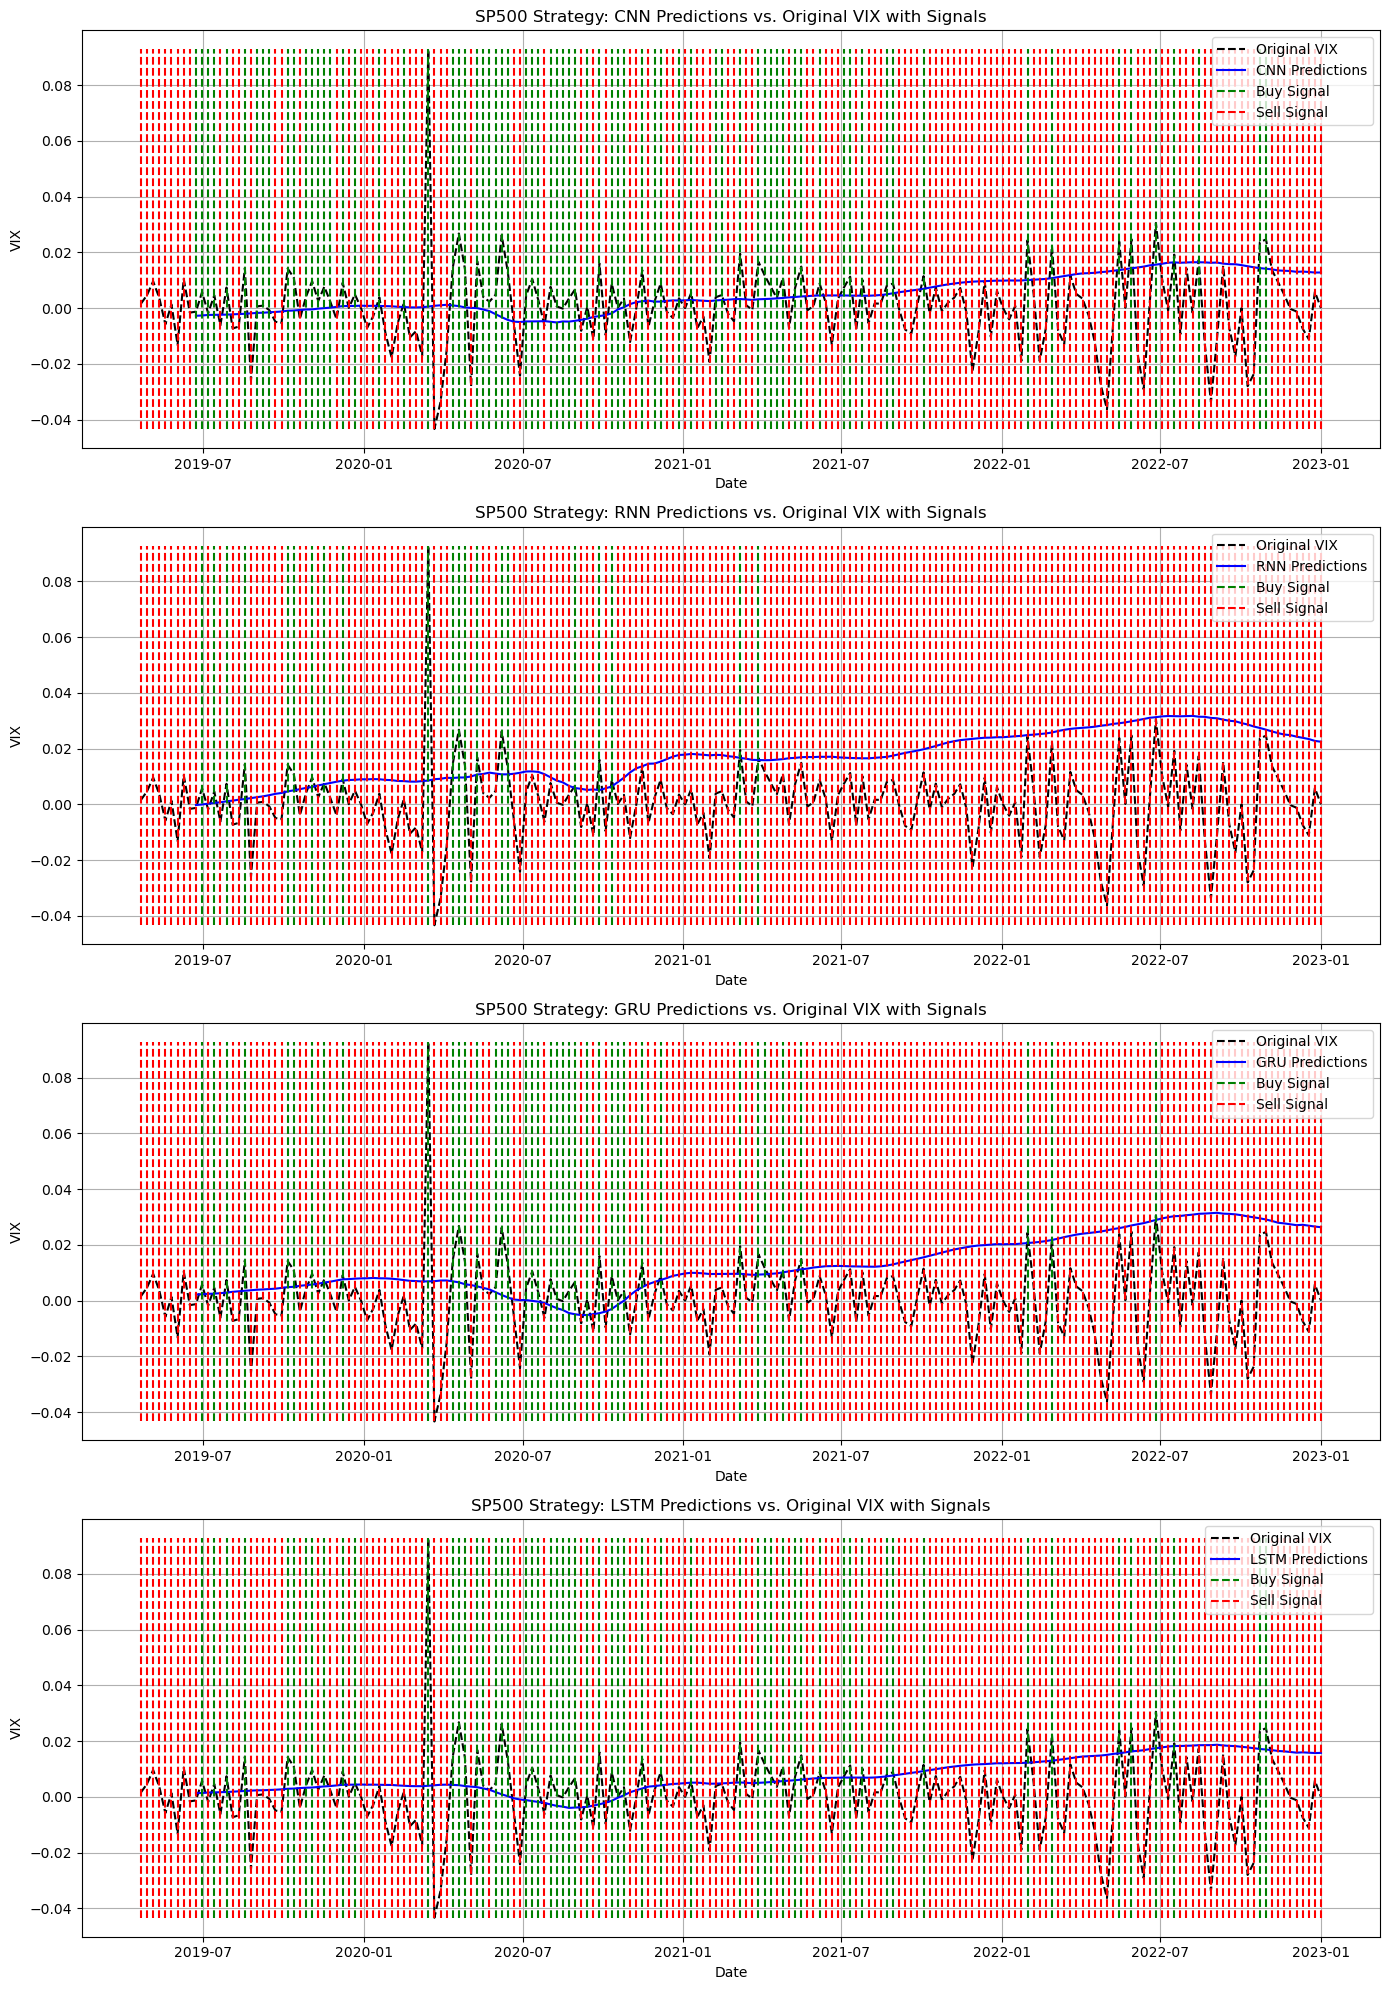

In [48]:
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/sp_signals"
model_names = ['CNN', 'RNN', 'GRU', 'LSTM']

# Generate signal tables for both strategies
signal_table_sp = generate_signal_table_vol(predictions_test_df_sp)


# Plot signals for Volatility strategy
plot_signals_sp500(predictions_test_df_sp, signal_table_sp, model_names, output_dir)


# 6. Comined Strategies

## 6.1 VIX

In [49]:
from Signal_Generator.signal_generator import generate_majority_signal_table


model_names = ['CNN', 'RNN', 'GRU', 'LSTM']
signal_column_name = 'vix_combined_signal'

vix_majority_signal_table = generate_majority_signal_table(signal_table_vol, model_names, signal_column_name)
print(vix_majority_signal_table)

           vix_combined_signal       Real  SP500_Return
Date                                                   
2019-04-21                Sell  12.090000  1.579094e-03
2019-04-28                Sell  12.730000  4.685293e-03
2019-05-05                Sell  12.870000  9.638278e-03
2019-05-12                Sell  16.040001  3.720297e-03
2019-05-19                Sell  15.960000 -5.837332e-03
...                        ...        ...           ...
2022-12-04                 Buy  19.059999 -1.194661e-03
2022-12-11                 Buy  22.830000 -7.349578e-03
2022-12-18                 Buy  22.620001 -1.113775e-02
2022-12-25                 Buy  20.870001  5.868103e-03
2023-01-01                 Buy  21.670000 -5.178249e-11

[194 rows x 3 columns]


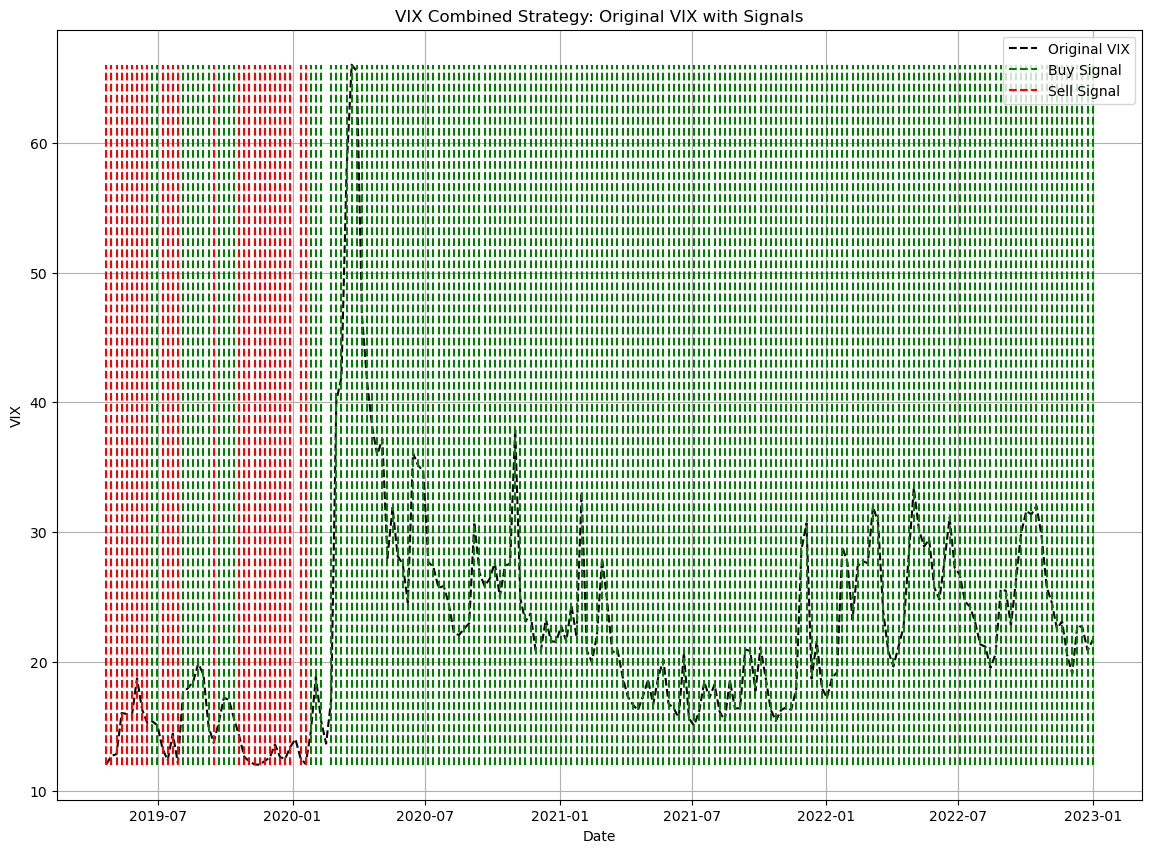

In [50]:
from Signal_Generator.signal_generator import plot_vix_combined_signal
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/vix_signals"
# Plot VIX combined signals
plot_vix_combined_signal(vix_majority_signal_table, output_dir)

## 6.2 SP

In [51]:
from Signal_Generator.signal_generator import generate_majority_signal_table
model_names = ['CNN', 'RNN', 'GRU', 'LSTM']
signal_column_name = 'sp_combined_signal'

sp_majority_signal_table = generate_majority_signal_table(signal_table_sp, model_names, signal_column_name)
print(sp_majority_signal_table)

           sp_combined_signal          Real
Date                                       
2019-04-21               Sell  1.579094e-03
2019-04-28               Sell  4.685293e-03
2019-05-05               Sell  9.638278e-03
2019-05-12               Sell  3.720297e-03
2019-05-19               Sell -5.837332e-03
...                       ...           ...
2022-12-04               Sell -1.194661e-03
2022-12-11               Sell -7.349578e-03
2022-12-18               Sell -1.113775e-02
2022-12-25               Sell  5.868103e-03
2023-01-01               Sell -5.178249e-11

[194 rows x 2 columns]


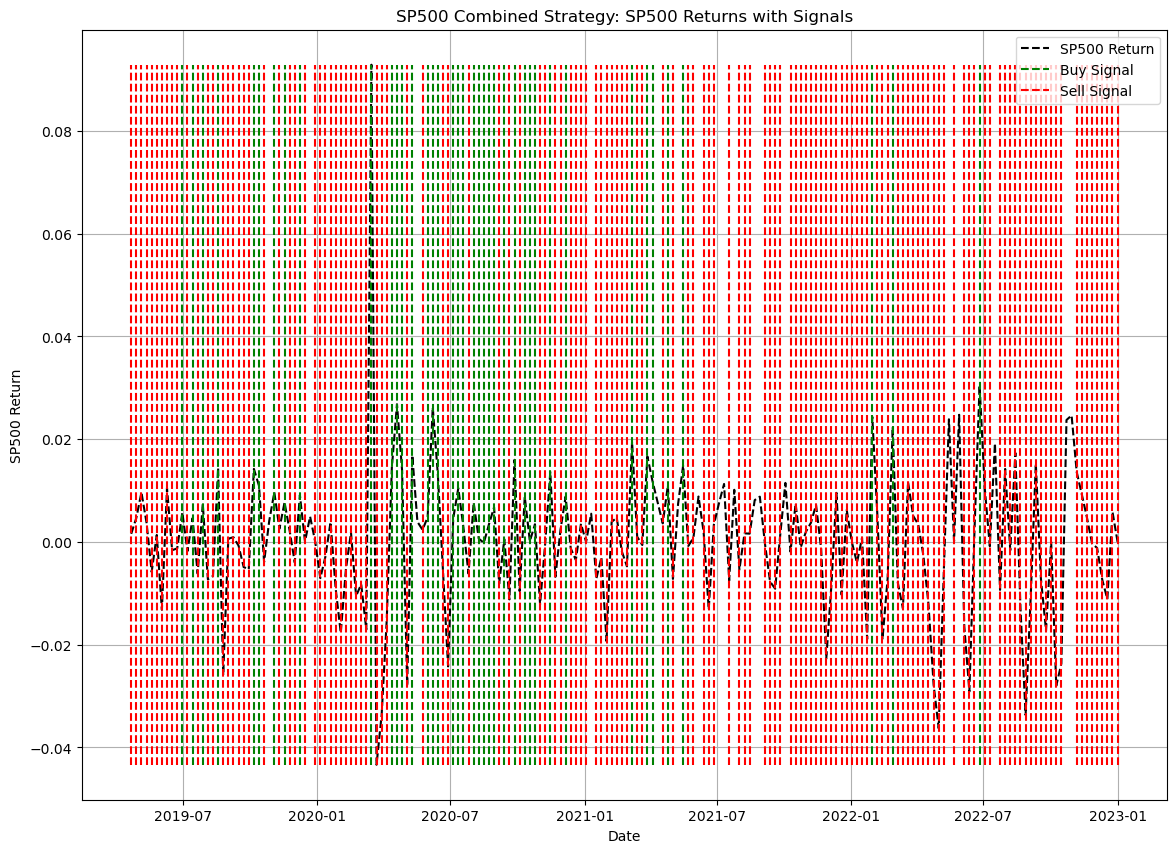

In [52]:
from Signal_Generator.signal_generator import plot_sp500_combined_signal
output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/sp_signals"
plot_sp500_combined_signal(sp_majority_signal_table, output_dir)

# 6.2 Common Vote Combination 

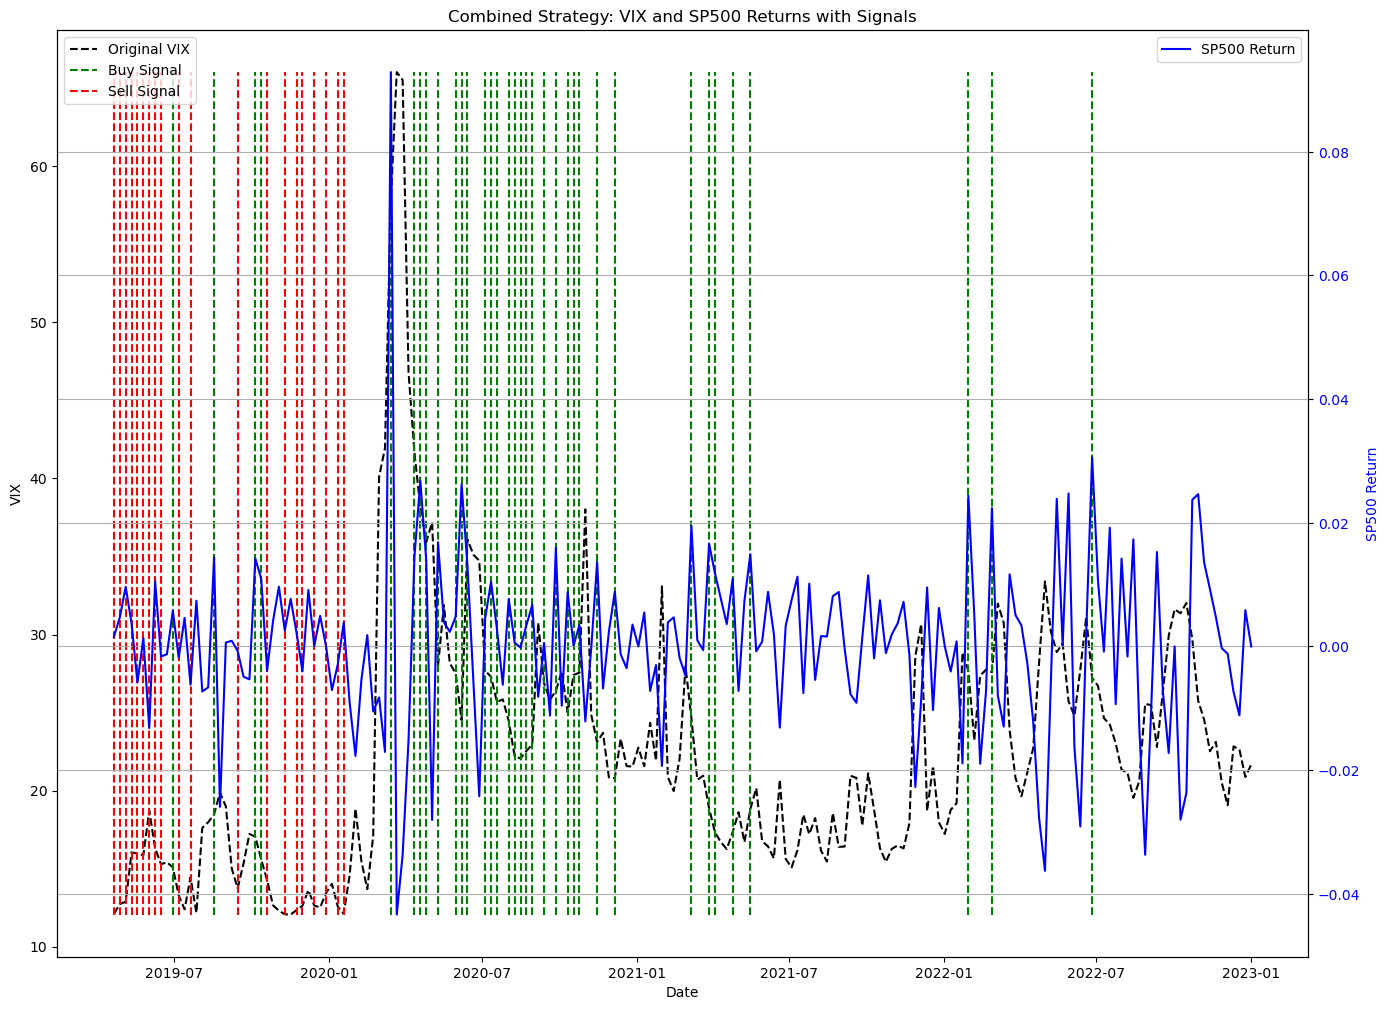

In [53]:
from Signal_Generator.signal_generator import combine_and_plot_signals

output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/all_combined_signals"
combined_signal_table = combine_and_plot_signals(vix_majority_signal_table, sp_majority_signal_table, output_dir)


In [57]:
vix_majority_signal_table

vix_combined_signal       Real  SP500_Return
Date                                                   
2019-04-21                Sell  12.090000  1.579094e-03
2019-04-28                Sell  12.730000  4.685293e-03
2019-05-05                Sell  12.870000  9.638278e-03
2019-05-12                Sell  16.040001  3.720297e-03
2019-05-19                Sell  15.960000 -5.837332e-03
...                        ...        ...           ...
2022-12-04                 Buy  19.059999 -1.194661e-03
2022-12-11                 Buy  22.830000 -7.349578e-03
2022-12-18                 Buy  22.620001 -1.113775e-02
2022-12-25                 Buy  20.870001  5.868103e-03
2023-01-01                 Buy  21.670000 -5.178249e-11

[194 rows x 3 columns]

In [58]:
combined_signal_table

combined_signal   Real_VIX    Real_SP500
Date                                               
2019-04-21            Sell  12.090000  1.579094e-03
2019-04-28            Sell  12.730000  4.685293e-03
2019-05-05            Sell  12.870000  9.638278e-03
2019-05-12            Sell  16.040001  3.720297e-03
2019-05-19            Sell  15.960000 -5.837332e-03
...                    ...        ...           ...
2022-12-04            Hold  19.059999 -1.194661e-03
2022-12-11            Hold  22.830000 -7.349578e-03
2022-12-18            Hold  22.620001 -1.113775e-02
2022-12-25            Hold  20.870001  5.868103e-03
2023-01-01            Hold  21.670000 -5.178249e-11

[194 rows x 3 columns]

# 7. Backtest

## 7.1 Simple Strategies

In [77]:
signal_table_sp 

CNN_Signal RNN_Signal GRU_Signal LSTM_Signal          Real
Date                                                                 
2019-04-21       Sell       Sell       Sell        Sell  1.579094e-03
2019-04-28       Sell       Sell       Sell        Sell  4.685293e-03
2019-05-05       Sell       Sell       Sell        Sell  9.638278e-03
2019-05-12       Sell       Sell       Sell        Sell  3.720297e-03
2019-05-19       Sell       Sell       Sell        Sell -5.837332e-03
...               ...        ...        ...         ...           ...
2022-12-04       Sell       Sell       Sell        Sell -1.194661e-03
2022-12-11       Sell       Sell       Sell        Sell -7.349578e-03
2022-12-18       Sell       Sell       Sell        Sell -1.113775e-02
2022-12-25       Sell       Sell       Sell        Sell  5.868103e-03
2023-01-01       Sell       Sell       Sell        Sell -5.178249e-11

[194 rows x 5 columns]

[*********************100%%**********************]  1 of 1 completed


Signal DataFrame head:
            CNN_Signal RNN_Signal GRU_Signal LSTM_Signal      Real
Date                                                             
2019-04-21       Sell       Sell       Sell        Sell  0.001579
2019-04-28       Sell       Sell       Sell        Sell  0.004685
2019-05-05       Sell       Sell       Sell        Sell  0.009638
2019-05-12       Sell       Sell       Sell        Sell  0.003720
2019-05-19       Sell       Sell       Sell        Sell -0.005837
SP500 Returns DataFrame head:
             SP500_Return
Date                    
2010-01-10      0.002636
2010-01-17     -0.001541
2010-01-24     -0.009796
2010-01-31     -0.003274
2010-02-07     -0.001296
Signal DataFrame Date Range:  2019-04-21 00:00:00  to  2023-01-01 00:00:00
SP500 Returns DataFrame Date Range:  2010-01-10 00:00:00  to  2023-01-01 00:00:00
Combined DataFrame head after join:
            CNN_Signal RNN_Signal GRU_Signal LSTM_Signal      Real  \
Date                                         

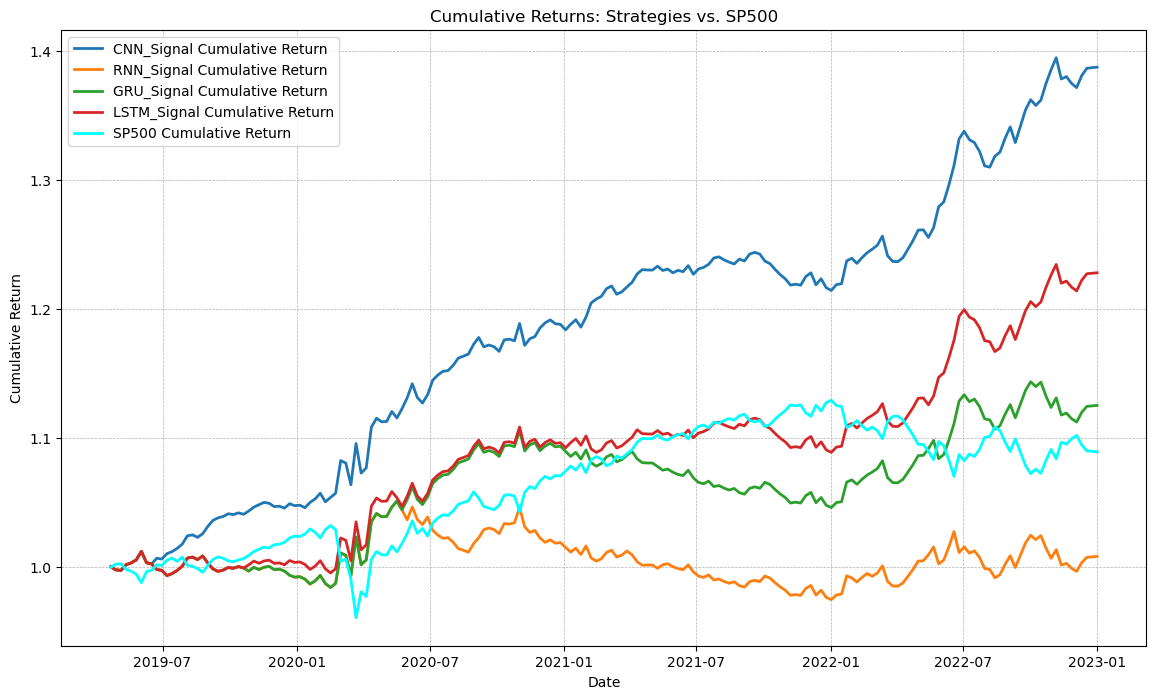

            Cumulative_Strategy_Return  Cumulative_SP500_Return
Date                                                           
2019-04-21                    1.000204                 0.999796
2019-04-28                    0.997808                 1.002191
2019-05-05                    0.997402                 1.002599
2019-05-12                    1.001768                 0.998210
2019-05-19                    1.003214                 0.996769
             Annualized Return  Sharpe Ratio  Information Ratio  Max Drawdown
CNN_Signal            0.530319      5.509202           2.007177     -0.023761
RNN_Signal            0.010664      0.106613          -0.562154     -0.072656
GRU_Signal            0.165716      1.665073           0.246522     -0.053995
LSTM_Signal           0.305983      3.105153           0.955879     -0.027162


In [78]:
from BackTest.BackTest import backtest_strategy
import yfinance as yf

# Set the date range
start_date = '2010-01-01'
end_date = '2023-01-01'
def download_sp500_data(start_date, end_date):
    # Download S&P 500 data from Yahoo Finance
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    return sp500

def calculate_returns(sp500_data):
    # Calculate daily returns
    sp500_data['Return'] = sp500_data['Adj Close'].pct_change()
    return sp500_data

# Download and process S&P 500 data
sp500_data = download_sp500_data(start_date, end_date)
sp500_data = calculate_returns(sp500_data)

# Drop NaN values and rename the column to SP500_Return
returns = sp500_data[['Return']].dropna().rename(columns={'Return': 'SP500_Return'})
# conver to weekly
returns = returns.resample('W').mean()

output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/backtest_results"
os.makedirs(output_dir, exist_ok=True)

signal_names = ['CNN_Signal', 'RNN_Signal', 'GRU_Signal', 'LSTM_Signal']  # Add more signal names if available
cumulative_returns_df, performance_metrics_df = backtest_strategy(signal_table_sp, returns, signal_names, output_dir)
print(cumulative_returns_df.head())
print(performance_metrics_df)


## 7.2 simple Backtest vol

In [79]:
signal_table_vol

CNN_Signal RNN_Signal GRU_Signal LSTM_Signal       Real  \
Date                                                                 
2019-04-21       Sell       Sell       Sell        Sell  12.090000   
2019-04-28       Sell       Sell       Sell        Sell  12.730000   
2019-05-05       Sell       Sell       Sell        Sell  12.870000   
2019-05-12       Sell       Sell       Sell        Sell  16.040001   
2019-05-19       Sell       Sell       Sell        Sell  15.960000   
...               ...        ...        ...         ...        ...   
2022-12-04        Buy        Buy        Buy         Buy  19.059999   
2022-12-11        Buy        Buy        Buy         Buy  22.830000   
2022-12-18        Buy        Buy        Buy         Buy  22.620001   
2022-12-25        Buy        Buy        Buy         Buy  20.870001   
2023-01-01        Buy        Buy        Buy         Buy  21.670000   

            SP500_Return  
Date                      
2019-04-21  1.579094e-03  
2019-04-28  4.685293e-03  
2019-05-05  9.638278e-03  
2019-05-12  3.720297e-03  
2019-05-19 -5.837332e-03  
...                  ...  
2022-12-04 -1.194661e-03  
2022-12-11 -7.349578e-03  
2022-12-18 -1.113775e-02  
2022-12-25  5.868103e-03  
2023-01-01 -5.178249e-11  

[194 rows x 6 columns]

[*********************100%%**********************]  1 of 1 completed


Signal DataFrame head:
            CNN_Signal RNN_Signal GRU_Signal LSTM_Signal      Real
Date                                                             
2019-04-21       Sell       Sell       Sell        Sell  0.001579
2019-04-28       Sell       Sell       Sell        Sell  0.004685
2019-05-05       Sell       Sell       Sell        Sell  0.009638
2019-05-12       Sell       Sell       Sell        Sell  0.003720
2019-05-19       Sell       Sell       Sell        Sell -0.005837
SP500 Returns DataFrame head:
             SP500_Return
Date                    
2010-01-10      0.002636
2010-01-17     -0.001541
2010-01-24     -0.009796
2010-01-31     -0.003274
2010-02-07     -0.001296
Signal DataFrame Date Range:  2019-04-21 00:00:00  to  2023-01-01 00:00:00
SP500 Returns DataFrame Date Range:  2010-01-10 00:00:00  to  2023-01-01 00:00:00
Combined DataFrame head after join:
            CNN_Signal RNN_Signal GRU_Signal LSTM_Signal      Real  \
Date                                         

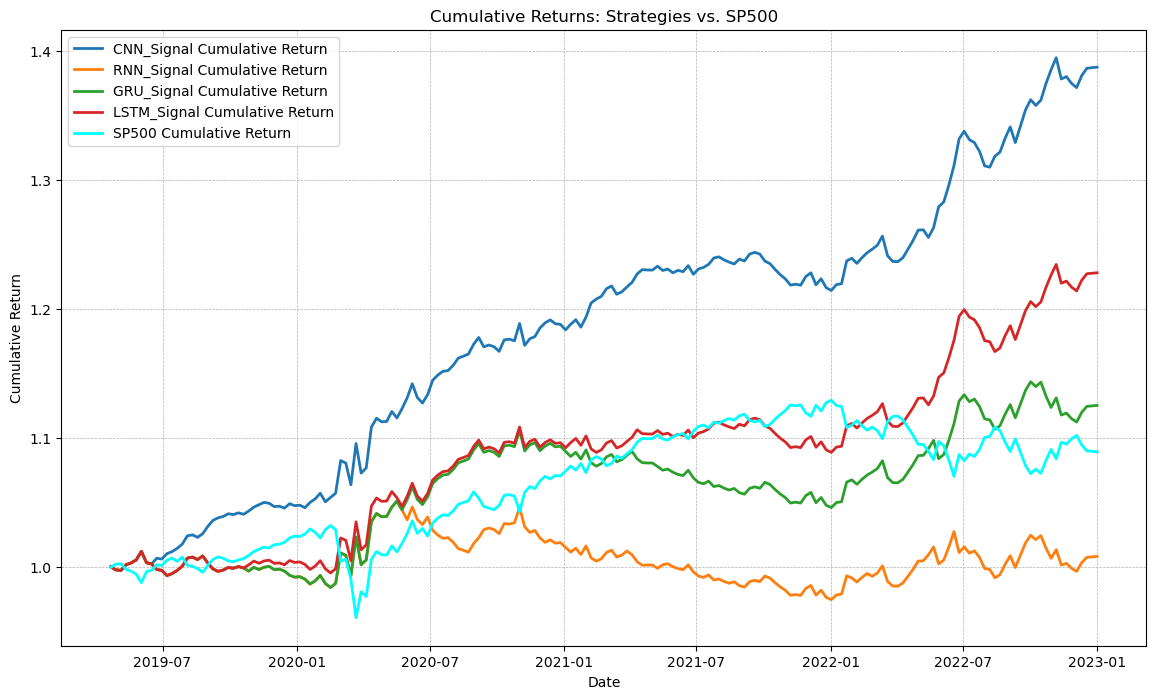

            Cumulative_Strategy_Return  Cumulative_SP500_Return
Date                                                           
2019-04-21                    1.000204                 0.999796
2019-04-28                    0.997808                 1.002191
2019-05-05                    0.997402                 1.002599
2019-05-12                    1.001768                 0.998210
2019-05-19                    1.003214                 0.996769
             Annualized Return  Sharpe Ratio  Information Ratio  Max Drawdown
CNN_Signal            0.530319      5.509202           2.007177     -0.023761
RNN_Signal            0.010664      0.106613          -0.562154     -0.072656
GRU_Signal            0.165716      1.665073           0.246522     -0.053995
LSTM_Signal           0.305983      3.105153           0.955879     -0.027162


In [80]:
from BackTest.BackTest import backtest_strategy
import yfinance as yf

# Set the date range
start_date = '2010-01-01'
end_date = '2023-01-01'
def download_sp500_data(start_date, end_date):
    # Download S&P 500 data from Yahoo Finance
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    return sp500

def calculate_returns(sp500_data):
    # Calculate daily returns
    sp500_data['Return'] = sp500_data['Adj Close'].pct_change()
    return sp500_data

# Download and process S&P 500 data
sp500_data = download_sp500_data(start_date, end_date)
sp500_data = calculate_returns(sp500_data)

# Drop NaN values and rename the column to SP500_Return
returns = sp500_data[['Return']].dropna().rename(columns={'Return': 'SP500_Return'})
# conver to weekly
returns = returns.resample('W').mean()



output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/backtest_results"
os.makedirs(output_dir, exist_ok=True)

signal_names = ['CNN_Signal', 'RNN_Signal', 'GRU_Signal', 'LSTM_Signal']  # Add more signal names if available
cumulative_returns_df, performance_metrics_df = backtest_strategy(signal_table_sp, returns, signal_names, output_dir)
print(cumulative_returns_df.head())
print(performance_metrics_df)


## 7.3 SP Majority and VIX Majority and VIX SP

In [84]:
# Ensure the Date index is set for all DataFrames
sp_majority_signal_table.index = pd.to_datetime(sp_majority_signal_table.index)
vix_majority_signal_table.index = pd.to_datetime(vix_majority_signal_table.index)
combined_signal_table.index = pd.to_datetime(combined_signal_table.index)

# Select the specific columns to join
sp_combined = sp_majority_signal_table[['sp_combined_signal']]
vix_combined = vix_majority_signal_table[['vix_combined_signal']]
combined_signal = combined_signal_table[['combined_signal']]

# Join the tables on the Date index
merged_signals = sp_combined.join(vix_combined, how='inner').join(combined_signal, how='inner')

# Display the head of the merged table
print(merged_table.head())

           sp_combined_signal vix_combined_signal combined_signal
Date                                                             
2019-04-21               Sell                Sell            Sell
2019-04-28               Sell                Sell            Sell
2019-05-05               Sell                Sell            Sell
2019-05-12               Sell                Sell            Sell
2019-05-19               Sell                Sell            Sell


[*********************100%%**********************]  1 of 1 completed


Signal DataFrame head:
            sp_combined_signal vix_combined_signal combined_signal
Date                                                             
2019-04-21               Sell                Sell            Sell
2019-04-28               Sell                Sell            Sell
2019-05-05               Sell                Sell            Sell
2019-05-12               Sell                Sell            Sell
2019-05-19               Sell                Sell            Sell
SP500 Returns DataFrame head:
             SP500_Return
Date                    
2010-01-10      0.002636
2010-01-17     -0.001541
2010-01-24     -0.009796
2010-01-31     -0.003274
2010-02-07     -0.001296
Signal DataFrame Date Range:  2019-04-21 00:00:00  to  2023-01-01 00:00:00
SP500 Returns DataFrame Date Range:  2010-01-10 00:00:00  to  2023-01-01 00:00:00
Combined DataFrame head after join:
            sp_combined_signal vix_combined_signal combined_signal  \
Date                                         

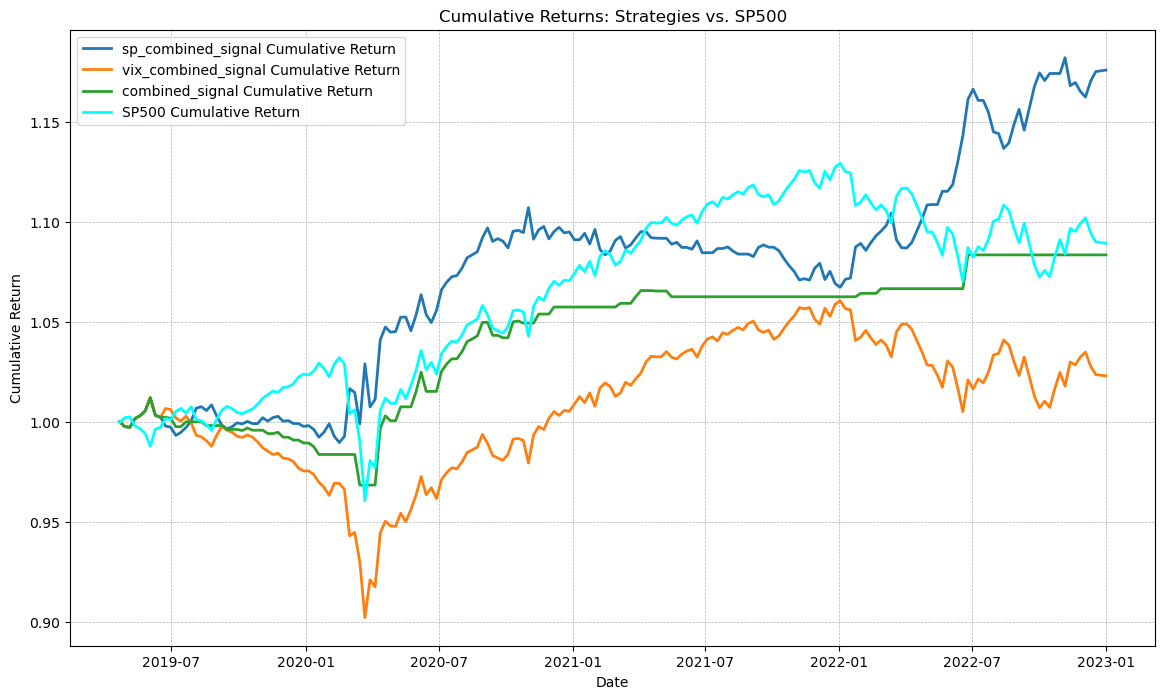

            Cumulative_Strategy_Return  Cumulative_SP500_Return
Date                                                           
2019-04-21                    1.000204                 0.999796
2019-04-28                    0.997808                 1.002191
2019-05-05                    0.997402                 1.002599
2019-05-12                    1.001768                 0.998210
2019-05-19                    1.003214                 0.996769
                     Annualized Return  Sharpe Ratio  Information Ratio  \
sp_combined_signal            0.234248      2.444264           0.599388   
vix_combined_signal           0.030132      0.301513          -2.245653   
combined_signal               0.109863      2.036419          -0.116062   

                     Max Drawdown  
sp_combined_signal      -0.035967  
vix_combined_signal     -0.108583  
combined_signal         -0.043098  


In [85]:
from BackTest.BackTest import backtest_strategy
import yfinance as yf

# Set the date range
start_date = '2010-01-01'
end_date = '2023-01-01'
def download_sp500_data(start_date, end_date):
    # Download S&P 500 data from Yahoo Finance
    sp500 = yf.download('^GSPC', start=start_date, end=end_date)
    return sp500

def calculate_returns(sp500_data):
    # Calculate daily returns
    sp500_data['Return'] = sp500_data['Adj Close'].pct_change()
    return sp500_data

# Download and process S&P 500 data
sp500_data = download_sp500_data(start_date, end_date)
sp500_data = calculate_returns(sp500_data)

# Drop NaN values and rename the column to SP500_Return
returns = sp500_data[['Return']].dropna().rename(columns={'Return': 'SP500_Return'})
# conver to weekly
returns = returns.resample('W').mean()



output_dir = "C:/Users/peter/outs/onlyme/000. Reseach/000. Egyetem/2024tavasz/Selected/Deep_Index_Strategy_2/0. Paper Folder/backtest_results"
os.makedirs(output_dir, exist_ok=True)

signal_names = [ 'sp_combined_signal', 'vix_combined_signal', 'combined_signal']  # Add more signal names if available
cumulative_returns_df, performance_metrics_df = backtest_strategy(merged_signals, returns, signal_names, output_dir)
print(cumulative_returns_df.head())
print(performance_metrics_df)